# Romil Shah
Exploratory Data Analysis-IPL

## Importing Libraries and Loading dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
df_match = pd.read_csv('/content/matches.csv')
df_delivery=pd.read_csv('/content/deliveries.csv')
df_match

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
df_delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


Information about the matches

In [ ]:
print("Number of matches played:",df_match.shape[0])
print("Number of season:",len(df_match.season.unique()))

Number of matches played: 756
Number of season: 12


In [ ]:
df_match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


 Cleaning the data

In [ ]:
df_match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
df_match=df_match.drop(columns=['umpire3'],axis=1)


Analysis of the team

In [ ]:
print("Team won by maximum runs")
df_match.iloc[df_match['win_by_runs'].idxmax()]['winner']

Team won by maximum runs


'Mumbai Indians'

In [ ]:
print("Team won by maximum wickets")
df_match.iloc[df_match['win_by_wickets'].idxmax()]['winner']

Team won by maximum wickets


'Kolkata Knight Riders'

In [ ]:
print("Team won by minimum runs")
df_match.iloc[df_match['win_by_runs'].idxmin()]['winner']

Team won by minimum runs


'Rising Pune Supergiant'

In [ ]:
print("Team won by minimum runs")
df_match.iloc[df_match[df_match['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

Team won by minimum runs


'Kolkata Knight Riders'

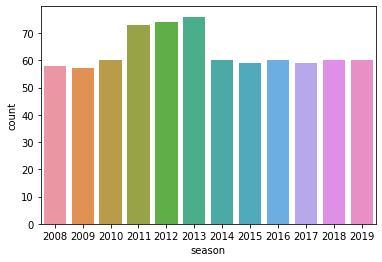

<Figure size 1080x576 with 0 Axes>

In [ ]:
# Number of matches each season
sb.countplot(x='season',data=df_match)
plt.figure(figsize=(15,8))
plt.show()

Analysis of the stadium


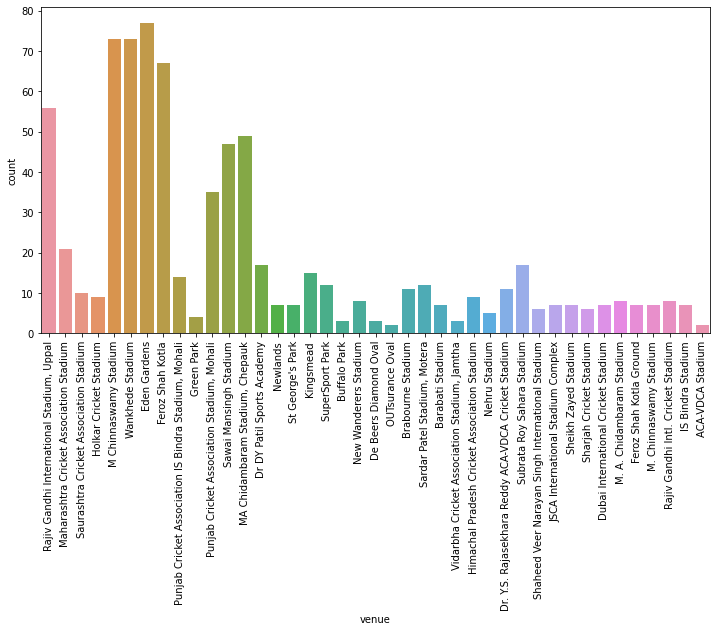

In [ ]:
#Number of matches each venue
plt.figure(figsize=(12,6))
sb.countplot(x='venue',data=df_match)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
temp_df=pd.melt(df_match,id_vars=['id','season'],value_vars=['team1','team2'])
temp_df

,id,season,variable,value
0,1,2017,team1,Sunrisers Hyderabad
1,2,2017,team1,Mumbai Indians
2,3,2017,team1,Gujarat Lions
3,4,2017,team1,Rising Pune Supergiant
4,5,2017,team1,Royal Challengers Bangalore
...,...,...,...,...
1507,11347,2019,team2,Mumbai Indians
1508,11412,2019,team2,Mumbai Indians
1509,11413,2019,team2,Delhi Capitals
1510,11414,2019,team2,Chennai Super Kings


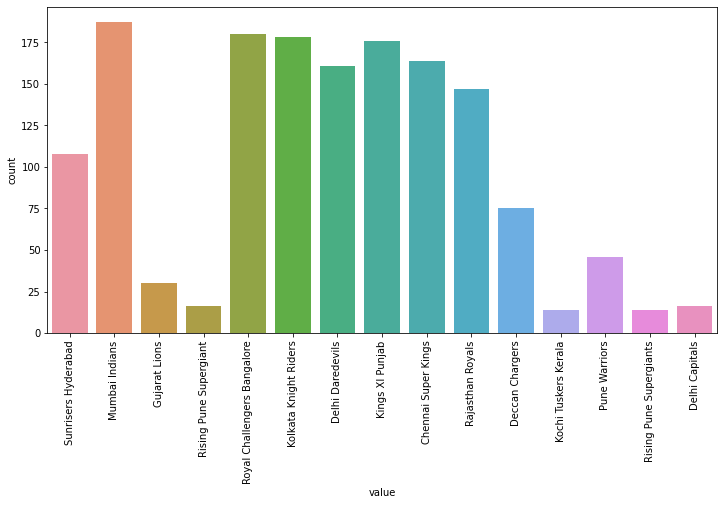

In [ ]:
plt.figure(figsize=(12,6))
sb.countplot(x='value',data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

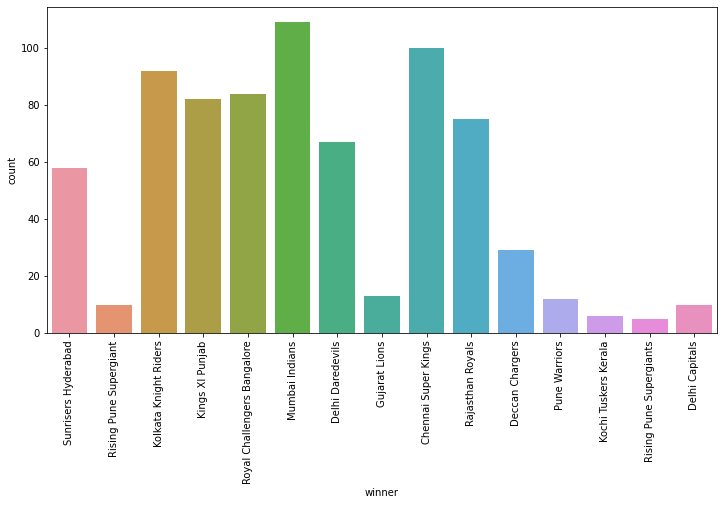

In [ ]:
#Number of wins per team
plt.figure(figsize=(12,6))
sb.countplot(x='winner',data=df_match)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#winner each season
temp_df=df_match.drop_duplicates(subset=['season'],keep='last')[['season','winner']].reset_index(drop=True)
temp_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


In [ ]:
#Toss Decision
temp_series=df_match.toss_decision.value_counts()
temp_series

field    463
bat      293
Name: toss_decision, dtype: int64

Visualising the data

([<matplotlib.patches.Wedge at 0x7f845fc2bb50>,
 [Text(-1.0999905024725674, -0.004571046942289507, 'field'),
  Text(1.0999905024725674, 0.004571046942289373, 'bat')],
 [Text(-0.5999948195304913, -0.002493298332157913, '61.2%'),
  Text(0.5999948195304913, 0.0024932983321578396, '38.8%')])

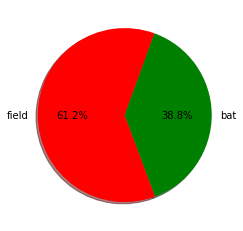

In [ ]:
labels=(np.array(temp_series.index))
sizes=(np.array((temp_series/temp_series.sum())*100))
colors=['red','green']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=70)

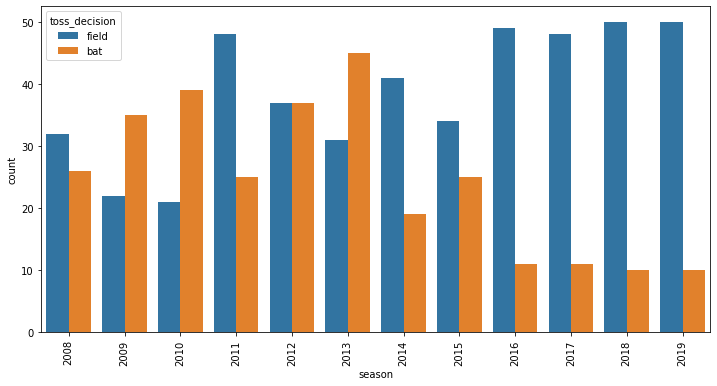

In [ ]:
plt.figure(figsize=(12,6))
sb.countplot(x='season',hue='toss_decision',data=df_match)
plt.xticks(rotation='vertical')
plt.show()

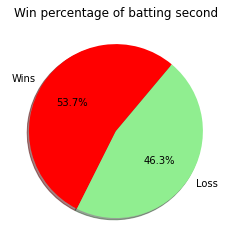

In [ ]:
#Win percent of batting second, assumed from above figure
num_of_wins=(df_match.win_by_wickets>0).sum()
num_of_loss=(df_match.win_by_wickets==0).sum()
labels=['Wins','Loss']
total=float(num_of_wins + num_of_loss)
sizes=[(num_of_wins/total)*100,(num_of_loss/total)*100]
colors=['red','lightgreen']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=50)
plt.title("Win percentage of batting second")
plt.show()

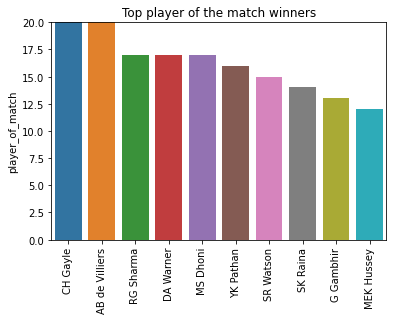

In [ ]:
top_players=df_match.player_of_match.value_counts()[:10]
fig,ax=plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match winners")
#top_players.plot.bar()
sb.barplot(x=top_players.index,y=top_players,orient='v');
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
ss=df_match['toss_winner']==df_match['winner']
ss.groupby(ss).size()


False    363
True     393
dtype: int64

In [ ]:
round(ss.groupby(ss).size()/ss.count()*100,2)

False    48.02
True     51.98
dtype: float64

In [ ]:
#toss performance
df_match[df_match['win_by_runs']>0].groupby(['winner'])['win_by_runs'].apply(np.median).sort_values(ascending=False)

winner
Delhi Capitals                 37.0
Rising Pune Supergiants        26.5
Rajasthan Royals               26.0
Mumbai Indians                 25.0
Kolkata Knight Riders          24.5
Chennai Super Kings            24.0
Pune Warriors                  23.0
Royal Challengers Bangalore    20.0
Rising Pune Supergiant         20.0
Kings XI Punjab                17.0
Delhi Daredevils               17.0
Sunrisers Hyderabad            15.5
Deccan Chargers                14.5
Kochi Tuskers Kerala           11.5
Gujarat Lions                   1.0
Name: win_by_runs, dtype: float64

In [ ]:
#orange cap
or_cap=df_match[['id','season']]
or_cap=or_cap.merge(df_delivery,left_on='id',right_on='match_id')
or_cap=or_cap.groupby(['batsman','season'])['batsman_runs'].sum().reset_index()
or_cap=or_cap.sort_values('batsman_runs',ascending=False)
or_cap=or_cap.drop_duplicates(subset=['season'],keep='first')



In [ ]:
or_cap

,batsman,season,batsman_runs
1700,V Kohli,2016,973
799,KS Williamson,2018,747
946,MEK Hussey,2013,733
321,CH Gayle,2012,733
388,DA Warner,2019,727
1357,RV Uthappa,2014,660
387,DA Warner,2017,641
1553,SR Tendulkar,2010,618
1474,SE Marsh,2008,616
320,CH Gayle,2011,608


In [ ]:
#team with maximum boundaries
sixes=df_delivery[df_delivery['batsman_runs']==6]['batting_team'].value_counts().reset_index()
fours=df_delivery[df_delivery['batsman_runs']==4]['batting_team'].value_counts().reset_index()
scores=sixes.merge(fours,left_on='index',right_on='index')
scores.column=[['team_name','4s','6s']]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


Analysis of maximum boudaries

In [ ]:
scores

,index,batting_team_x,batting_team_y
0,Royal Challengers Bangalore,1132,2360
1,Mumbai Indians,1096,2588
2,Kings XI Punjab,976,2458
3,Chennai Super Kings,973,2193
4,Kolkata Knight Riders,930,2434
5,Delhi Daredevils,801,2158
6,Rajasthan Royals,681,2035
7,Sunrisers Hyderabad,533,1444
8,Deccan Chargers,400,957
9,Pune Warriors,196,525


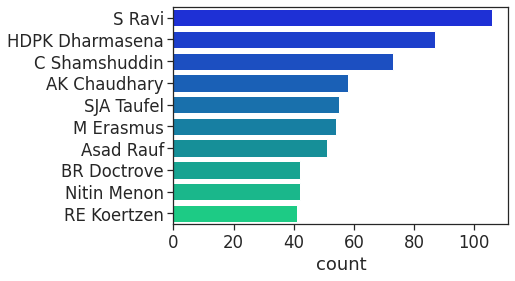

In [ ]:
#top umpires
ump=pd.DataFrame(pd.concat([df_match['umpire1'],df_match['umpire2']]),columns=['count'])
ump=ump.apply(pd.value_counts)
sb.barplot(y=ump[:10].index,x=ump[:10]['count'],palette='winter')

## Thank you!